In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

In [4]:
from google.colab import files
uploaded = files.upload()

Saving taxi_trip_pricing.csv to taxi_trip_pricing.csv


In [7]:
df = pd.read_csv('taxi_trip_pricing.csv')

In [9]:
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is of object type
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric (non-convertible values become NaN)

        # Check if there were any NaN values after conversion
        if df[col].isnull().any():
            print(f"Warning: Column {col} contains non-numeric values and was converted to NaN.")


In [10]:
df = df.dropna(axis=1, how='all')  # Remove columns with all NaN values

# Step 2: Handle Missing Values (NaN) using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Use mean to fill missing values
df_imputed = imputer.fit_transform(df)  # Transform the data

# Convert back to DataFrame to retain column names
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

print("Missing values imputed.")

Missing values imputed.


In [11]:
df = pd.DataFrame(df_imputed, columns=df.columns[:df_imputed.shape[1]])


In [12]:
print(df.head())

   Trip_Distance_km  Passenger_Count  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0         19.350000              3.0   3.560000         0.80             0.32   
1         47.590000              1.0   3.502989         0.62             0.43   
2         36.870000              1.0   2.700000         1.21             0.15   
3         30.330000              4.0   3.480000         0.51             0.15   
4         27.070547              3.0   2.930000         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  
0                  53.82   36.262400  
1                  40.57   56.874773  
2                  37.27   52.903200  
3                 116.81   36.469800  
4                  22.64   15.618000  


In [13]:
z_scores = np.abs(zscore(df))
threshold = 3  # Define a threshold for outliers
df = df[(z_scores < threshold).all(axis=1)]

In [14]:
X = df.iloc[:, :-1].values  # All columns except the last as features
y = df.iloc[:, -1].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

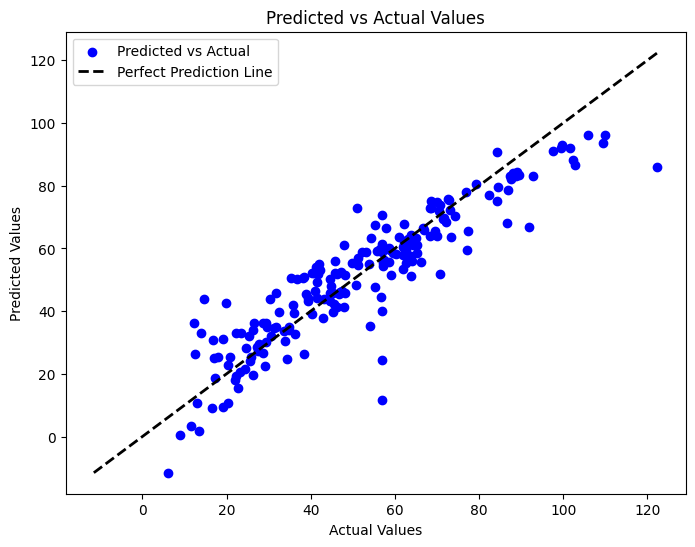

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization

# Scatter plot for Predicted vs Actual
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")

# Perfect Prediction Line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label="Perfect Prediction Line")

# Adding labels and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()

# Show the plot
plt.show()


In [20]:
x_annotation = y_test.max() * 0.7  # Adjust X annotation position
y_annotation = y_pred.max() * 0.9  # Adjust Y annotation position

In [21]:
print(df.columns)  # List all column names
print(df.head())  # Display the first five rows


Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')
   Trip_Distance_km  Passenger_Count  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0         19.350000              3.0   3.560000         0.80             0.32   
1         47.590000              1.0   3.502989         0.62             0.43   
2         36.870000              1.0   2.700000         1.21             0.15   
3         30.330000              4.0   3.480000         0.51             0.15   
4         27.070547              3.0   2.930000         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  
0                  53.82   36.262400  
1                  40.57   56.874773  
2                  37.27   52.903200  
3                 116.81   36.469800  
4                  22.64   15.618000  


In [24]:
# Check and display column names
print(df.columns)

# Verify column names
actual_column = 'Actual'  # Replace with your actual column name
predicted_column = 'Predicted'  # Replace with your predicted column name

# Ensure the required columns exist
if actual_column in df.columns and predicted_column in df.columns:
    sample_size = min(1000, len(df))
    plot_sample = df.sample(sample_size, random_state=42)

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(plot_sample[actual_column], plot_sample[predicted_column], color="blue", label="Predicted vs Actual")

    # Perfect Prediction Line
    min_val = min(plot_sample[actual_column].min(), plot_sample[predicted_column].min())
    max_val = max(plot_sample[actual_column].max(), plot_sample[predicted_column].max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label="Perfect Prediction Line")

    # Add labels and title
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs Actual Values (Sampled Data)")
    plt.legend()
    plt.show()
else:
    print("Required columns are missing in the DataFrame.")


Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')
Required columns are missing in the DataFrame.


<ipython-input-25-0d13436538e2>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left")


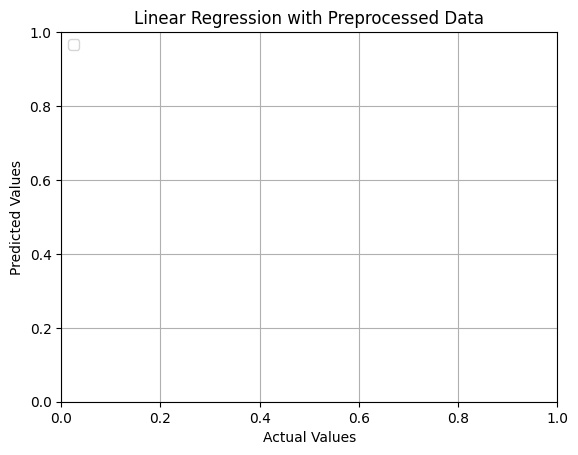

In [25]:
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression with Preprocessed Data")
plt.legend(loc="upper left")
plt.grid(True)

In [27]:
# Display the plot
plt.show()